#### PER-2020 - SIN-392 - Introdução ao Processamento Digital de Imagens 

# Aula 07a - A Transformada de Fourier
## Prof. João Fernando Mari
-----

## Importando as bibliotecas necessárias

In [1]:
%matplotlib notebook
import numpy as np
from numpy import fft
# pip install sounddevice
import sounddevice as sd
import matplotlib.pyplot as plt

## Criando um sinal simples
----
Um sinal senoidal com frequência de 10 Hz, amplitude de 1 e com duração de 4 segundos.
O sinal foi amostrado a uma taxa de 100 amostras por segundo.

In [2]:
# Frequencia do sinal, em Hz (ciclos por segundos)
freq_signal = 10 
# Taxa de amostragem. Número de amostras por segundo
taxa_amostragem = 100 
# Frequencia de amostragem
freq_amostragem = 1 / taxa_amostragem
# Duração do sinal (em segundos)
duracao_sinal = 2
# Numero de amostras
num_amostras = duracao_sinal * taxa_amostragem
# Eixo do tempo (em segundos)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)
# Sinal senoidal 
sinal = np.sin(freq_signal * 2*np.pi * tempo)

### Plotando o sinal

<IPython.core.display.Javascript object>


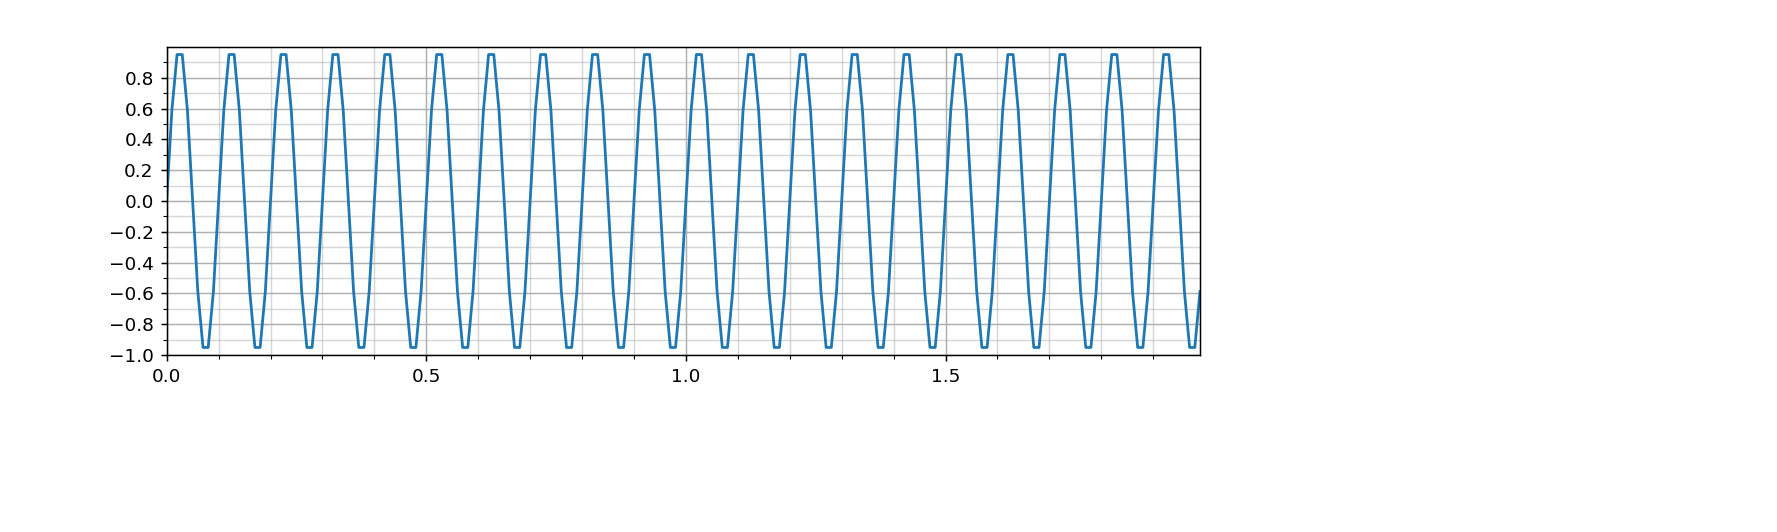

In [3]:
fig = plt.figure(figsize=(10, 3))
plt.plot(tempo, sinal)

plt.autoscale(enable=True, axis='both', tight=True)
ax = fig.gca()
ax.set_xticks(np.arange(0, 2.0, 0.5))
ax.set_xticks(np.arange(0, 2.0, 0.1), minor=True)
ax.set_yticks(np.arange(-1, 1.0, 0.2), minor=False)
ax.set_yticks(np.arange(-1, 1.0, 0.1), minor=True)
## ax.set_aspect('equal')
ax.grid(which='major', alpha=1.0)
ax.grid(which='minor', alpha=0.5)
ax.set_ylim(-1, 1)

## plt.axis('equal')
plt.show()

## A Transformada discreta de Fourier
----

* Transformada Discreta de Fourier 1D
<font size="6">
$$F(u) = \sum_{n=0}^{M-1}{f(x)e^{-j2 \pi ux \over{M}}}$$
</font>
<br />
<br />
* Transformada Inversa de Fourier Discreta 1D
<font size="6">
$$f(x) = {1 \over{M}} \sum_{m=0}^{M-1}{F(u)e^{j2 \pi ux \over{M}}}$$
</font>

In [4]:
# def DFT_slow(fx):
#     """Compute the discrete Fourier Transform of the 1D array x
#     References:
#     [2]
#     """
#     # Garante que o sinal f(x) esta em um arranjo NumPy do tipo float
#     fx = np.array(fx, dtype=float)
#     # Tamanho do sinal (número de amostras)
#     M = fx.shape[0]
#     # Eixo do tempo. 0 até N
#     x = np.arange(M)
#     print('x: ' + str(x))
#     # Eixo da frequencia (em Hz - ciclos por segundo)
#     u = x.reshape((M, 1))
#     print('u: ' + str(u.shape))
#     M = np.exp(-j * 2 * np.pi * u * x / M)
#     # print('M')
#     # print(M)
#     # Produto interno entre M e x
#     dft = np.dot(M, x)
#     print('dft')
#     print(dft)
    
#     return dft

# # Calcula a DFT de uma função simples.
# a=[4, 2, 3, 6, 1, 5, 4, 2]

# b = DFT_slow(a)
# print(np.abs(b))

# plt.figure()



### Aplicando a Transformada de Fourier sobre um sinal 1D

* Usando a implementação presente no NumPy

<IPython.core.display.Javascript object>


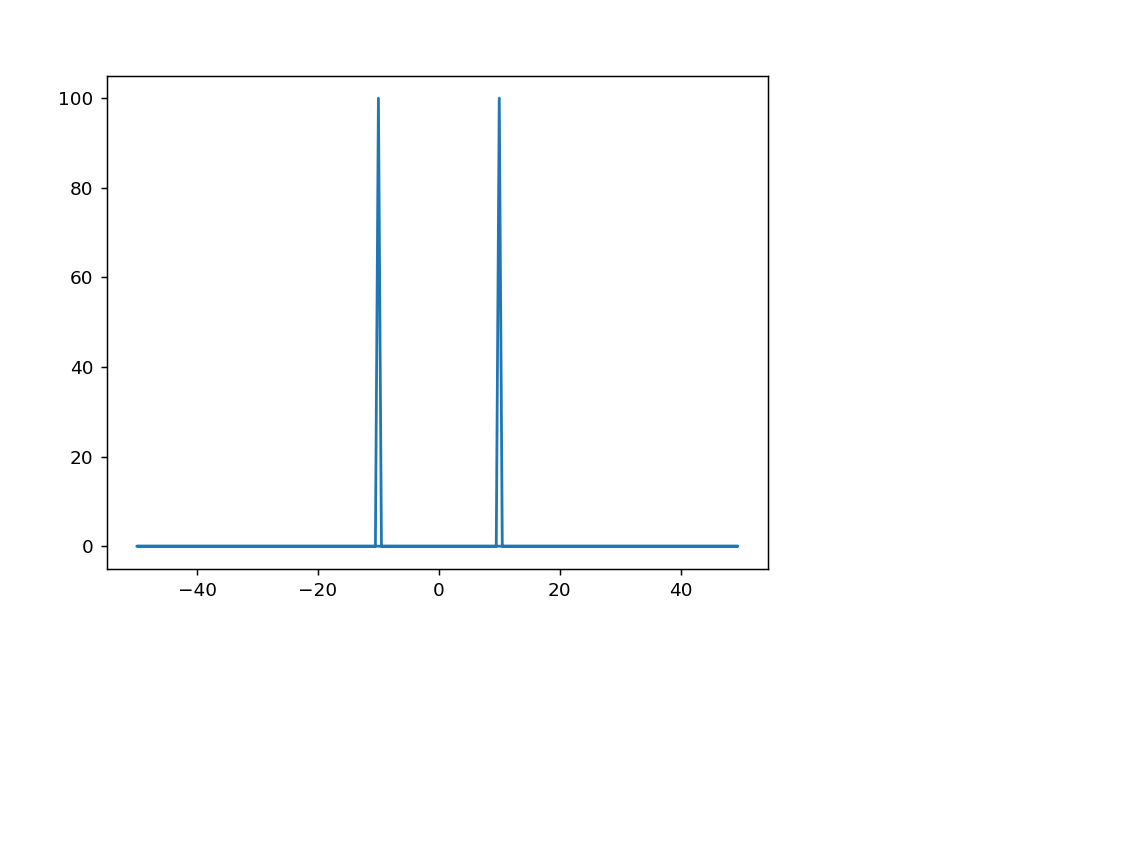

In [5]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure()
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

## Criando um sinal mais complexo
----
- Este sinal é composto pela soma de três sinais senoidais com amplitudes e frequências diferentes.
    - Sinal 1: 
        - Frequencia: 5 Hz
        - Amplitude: 8
    - Sinal 2:
        - Frequencia: 20 Hz
        - Amplitude: 6
    - Sinal 3: 
        - Frequencia: 100 Hz
        - Amplitude: 4

In [6]:
# Frequencia do sinal, em Hz (ciclos por segundos)
freq_signal_list = [5, 20, 100] 
# Lista de amplitudes
amp_list = [8, 6, 4]
# Taxa de amostragem. Número de amostras por segundo
taxa_amostragem = 400 
# Frequencia de amostragem
freq_amostragem = 1 / taxa_amostragem
# Duração do sinal (em segundos)
duracao_sinal = 2
# Numero de amostras
num_amostras = duracao_sinal * taxa_amostragem
# Eixo do tempo (em segundos)
tempo = np.linspace(0, duracao_sinal, num_amostras, endpoint=False)

# Lista com os sinais parciais
sinal_parc_list = []

# Sinal 
sinal = np.zeros(num_amostras, dtype=float)

for freq, amp in zip(freq_signal_list, amp_list):
    # Sinal senoidal 
    sinal_parc = np.sin(freq * 2*np.pi * tempo) * amp
    sinal_parc_list.append(sinal_parc)
    sinal = sinal + sinal_parc

### Plotando o sinal

<IPython.core.display.Javascript object>


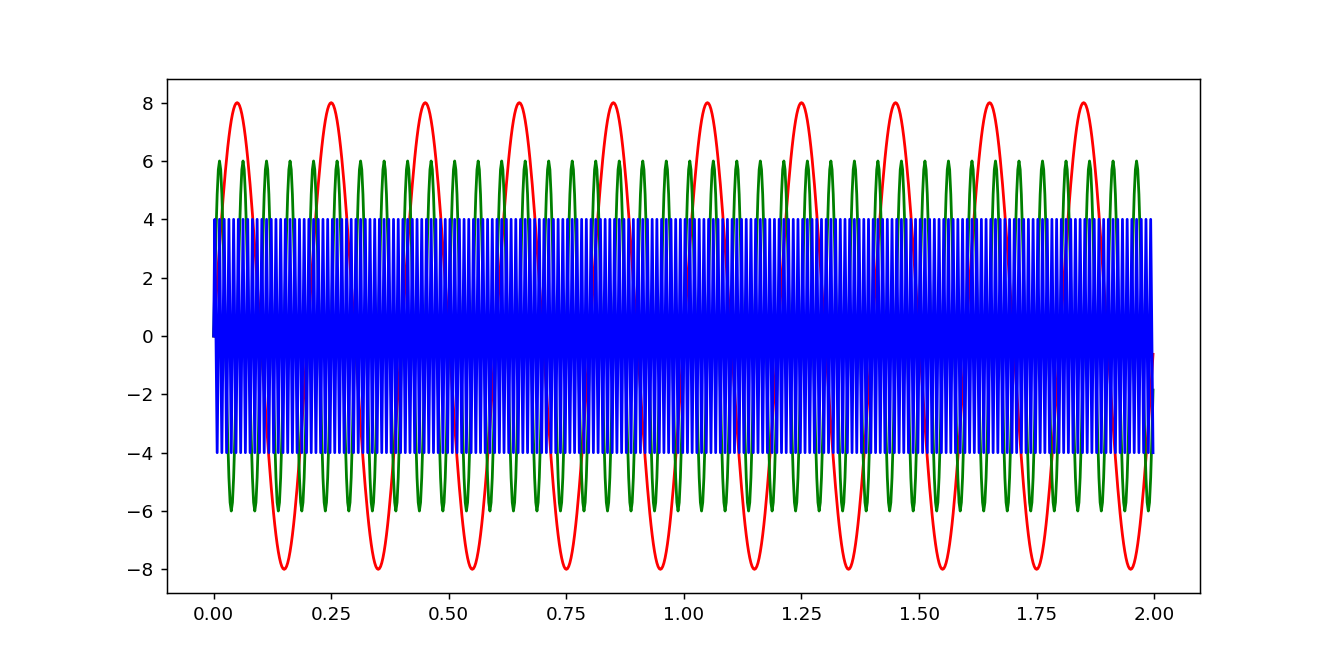

In [7]:
plt.figure(figsize=(10,5))
plt.plot(tempo, sinal_parc_list[0], color='r')
plt.plot(tempo, sinal_parc_list[1], color='g')
plt.plot(tempo, sinal_parc_list[2], color='b')
plt.show()

<IPython.core.display.Javascript object>


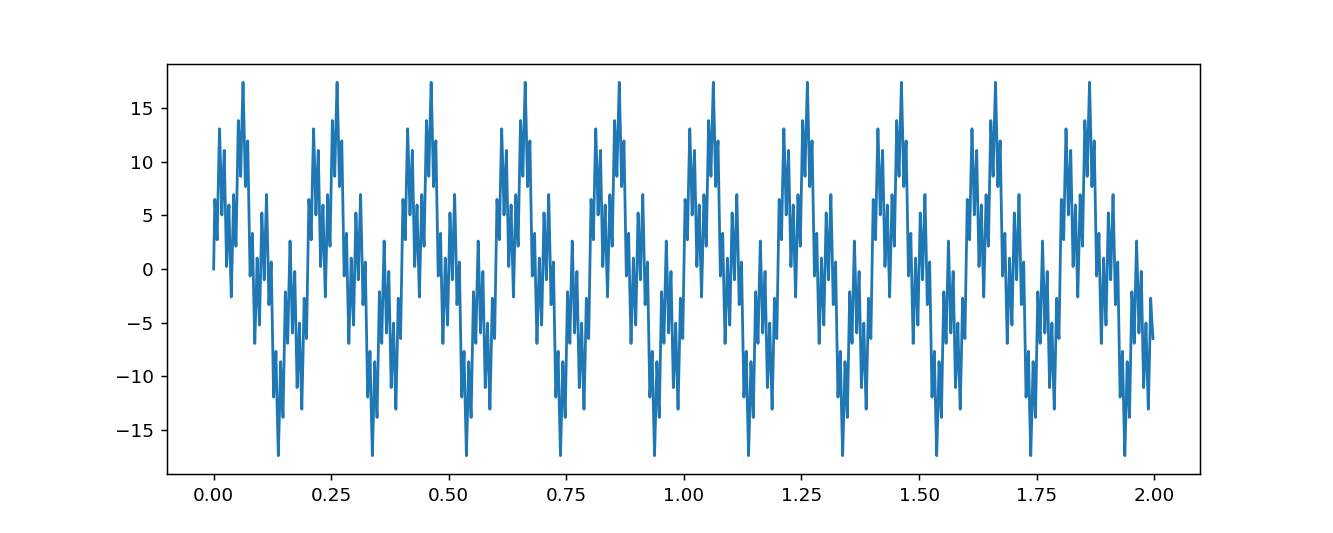

In [8]:
plt.figure(figsize=(10,4))
plt.plot(tempo, sinal)
plt.show()

In [9]:
# Convert it to wav format (16 bits)
sinal_wave = np.array(sinal, dtype=np.int16)

sd.play(sinal_wave, blocking=True)

In [10]:
# data = np.random.uniform(-1,1,44100)
# # write array to file:
# ### scikits.audiolab.wavwrite(data, 'test.wav', fs=44100, enc='pcm16')
# # play the array:
# scikits.audiolab.play(data, fs=44100)

## Calculando a Transformada de Fourier do sinal

<IPython.core.display.Javascript object>


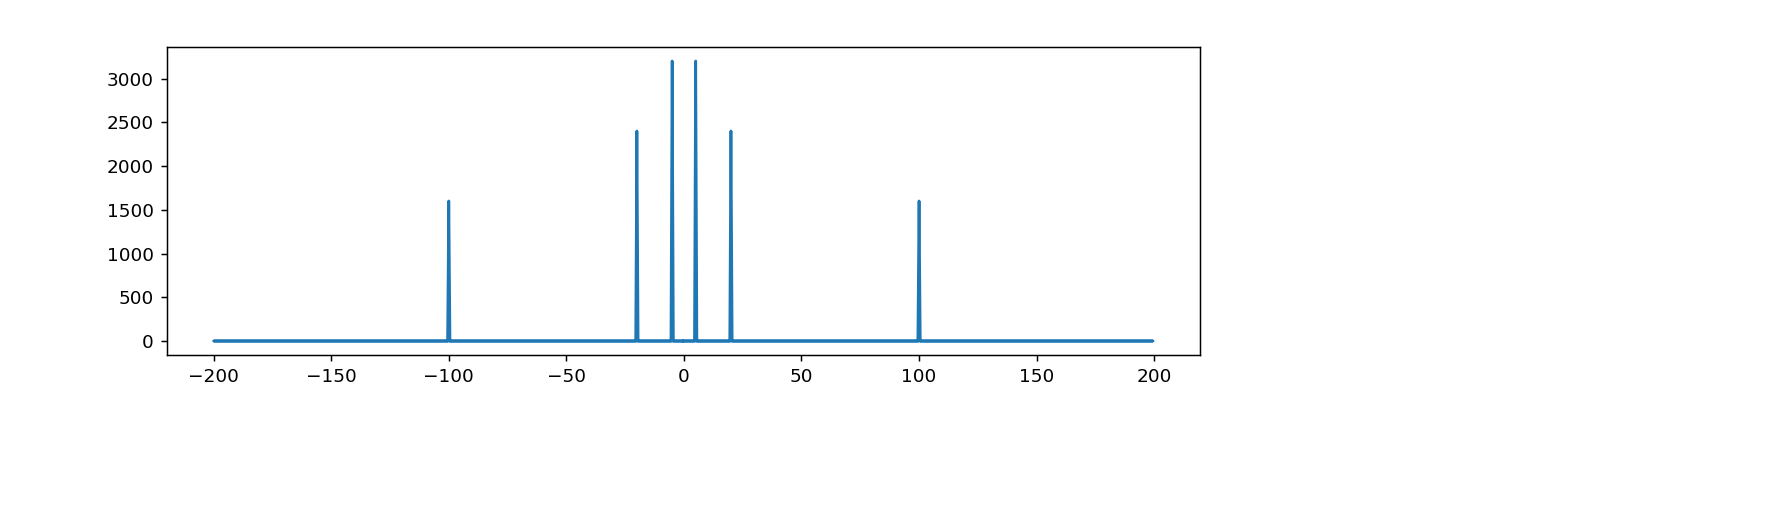

In [11]:
sinal_fft_y = fft.fft(sinal)
sinal_fft_x = fft.fftfreq(num_amostras, freq_amostragem)

plt.figure(figsize=(10,3))
plt.plot(sinal_fft_x, np.abs(sinal_fft_y))
plt.show()

### Filtrando as altas frequencias (filtragem passa-baixa)

<IPython.core.display.Javascript object>


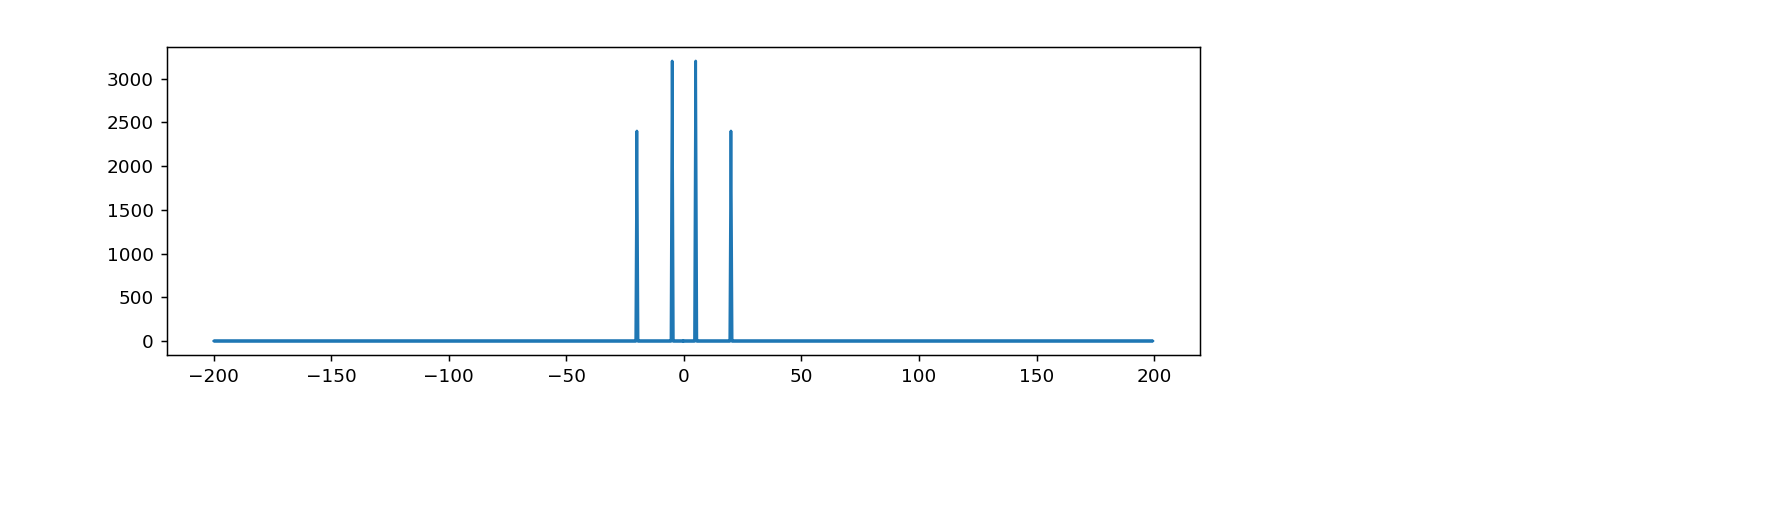

In [12]:
sinal_pb = sinal_fft_y.copy()
sinal_pb[np.abs(sinal_fft_x) > 50] = 0

plt.figure(figsize=(10,3))
plt.plot(sinal_fft_x, np.abs(sinal_pb))
plt.show()

<IPython.core.display.Javascript object>


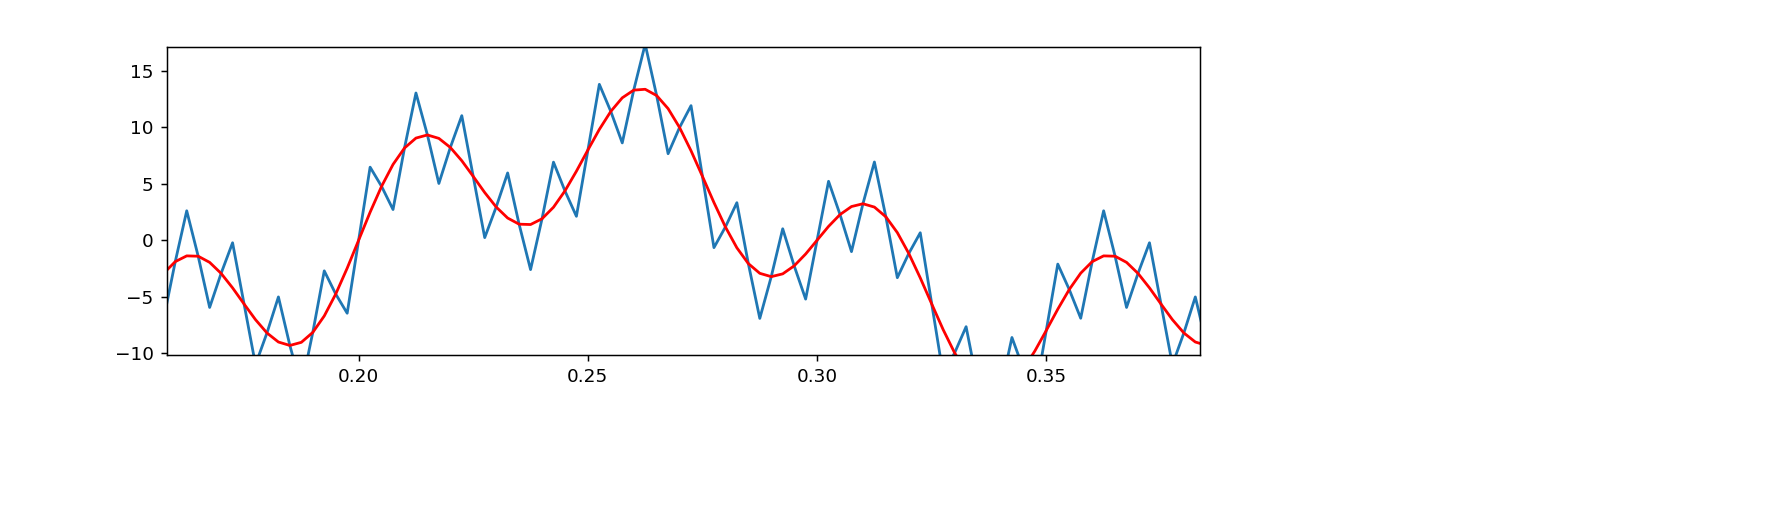

C:\Users\Joao\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [13]:
sinal_pb_ifft = fft.ifft(sinal_pb)

plt.figure(figsize=(10,3))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pb_ifft, color='red')
plt.show()

### Filtrando as baixas frequencias (filtragem passa-alta)

<IPython.core.display.Javascript object>


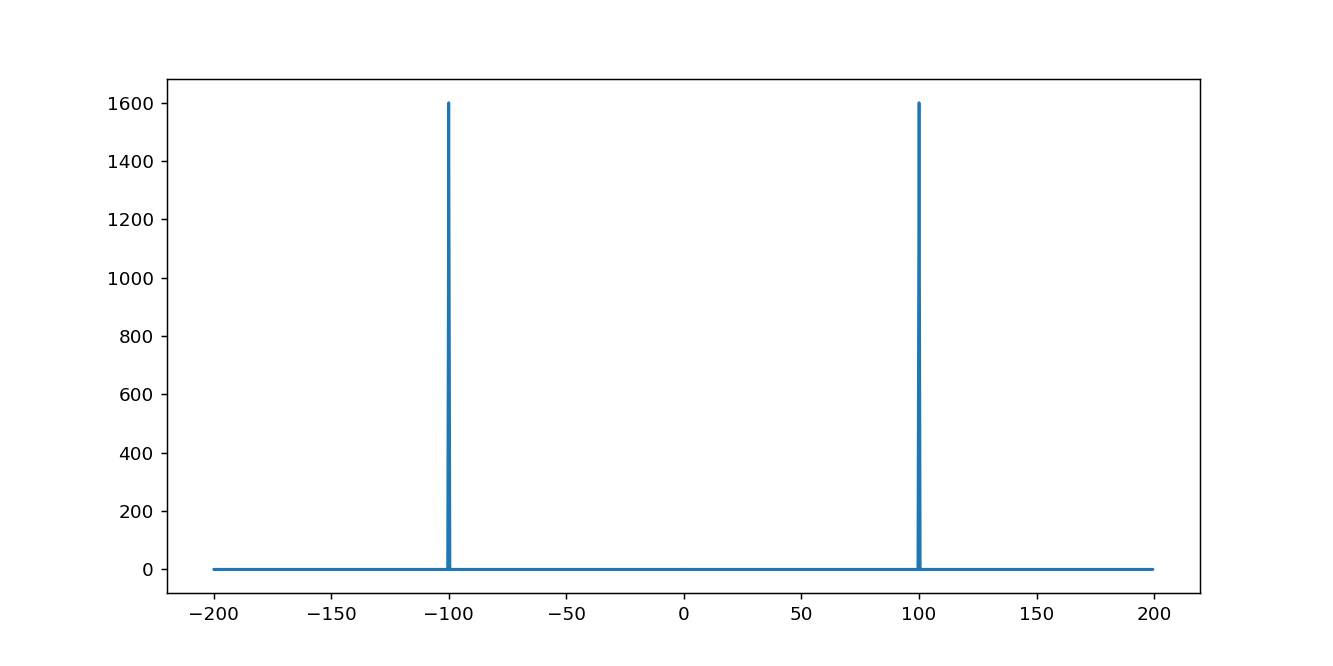

In [16]:
sinal_pa = sinal_fft_y.copy()
sinal_pa[np.abs(sinal_fft_x) < 25] = 0

plt.figure(figsize=(10,5))
plt.plot(sinal_fft_x, np.abs(sinal_pa))
plt.show()

<IPython.core.display.Javascript object>


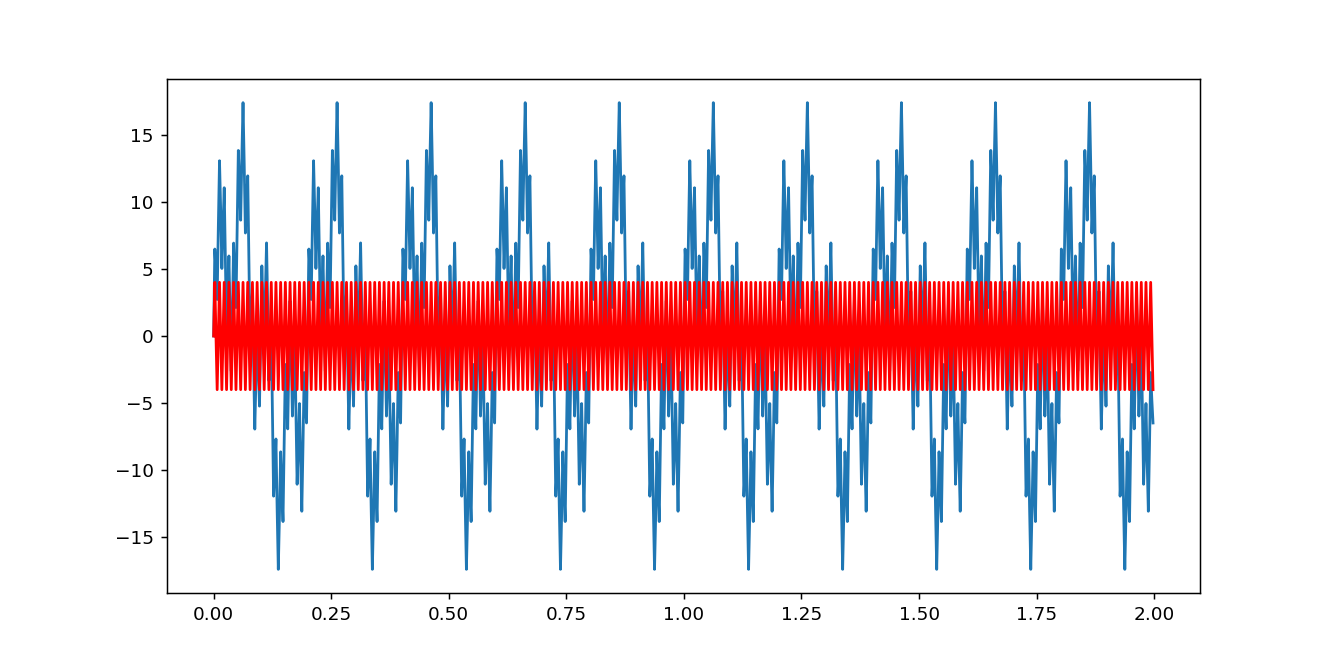

In [17]:
sinal_pa_ifft = fft.ifft(sinal_pa)

plt.figure(figsize=(10,5))
plt.plot(tempo, sinal)
plt.plot(tempo, sinal_pa_ifft, color='red')
plt.show()

## Bibliografia
----

MARQUES FILHO, O.; VIEIRA NETO, H. Processamento digital de imagens. Brasport, 1999.

    Disponível para download no site do autor (Exclusivo para uso pessoal)

    http://dainf.ct.utfpr.edu.br/~hvieir/pub.html  

GONZALEZ, R.C.; WOODS, R.E.; Processamento Digital de Imagens. 3ª edição. Editora Pearson, 2009.

    Disponível na Biblioteca Virtual da Pearson.

J. E. R. Queiroz, H. M. Gomes. Introdução ao Processamento Digital de Imagens. RITA. v. 13, 2006.

    http://www.dsc.ufcg.edu.br/~hmg/disciplinas/graduacao/vc-2016.2/Rita-Tutorial-PDI.pdf  

Prof. Aldo von Wangenheim. Morfologia Matemática

    http://www.inf.ufsc.br/~visao/morfologia.pdf

Prof. James Facon. A Morfologia Matemática e suas Aplicações em Processamento de Imagens - Minicurso – WVC 2011
    
    http://www.ppgia.pucpr.br/~facon/Books/2011WVCMinicurso2Morfo.pdf 

Universidade de Waterloo. Image Repository.

    http://links.uwaterloo.ca/Repository.html
    
The USC-SIPI Image Database.    
    
    http://sipi.usc.edu/database/database.php
    
Gaël Varoquaux Emmanuelle Gouillart; Olav Vahtras; Pierre de Buyl (editores). Scipy Lecture Notes. Release 2020.1
    
    Disponível em: http://scipy-lectures.org/

scikit-image. Documentação.

    https://scikit-image.org/docs/dev/index.html

NumPy. Documentação.

    https://numpy.org/doc/stable/
    
  
Plotting and manipulating FFTs for filtering

    https://scipy-lectures.org/intro/scipy/auto_examples/plot_fftpack.html
    


https://towardsdatascience.com/fast-fourier-transform-937926e591cb

[2] Understanding the FFT Algorithm 

    https://jakevdp.github.io/blog/2013/08/28/understanding-the-fft/
    
Digital Image Processing using Fourier Transform in Python

    https://medium.com/@hicraigchen/digital-image-processing-using-fourier-transform-in-python-bcb49424fd82